In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
data = pd.read_csv('../data/Customer-Churn.csv')

In [3]:
df = data.copy()

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


The dataset is moderately imbalanced, with roughly one-quarter of customers churning. Accuracy alone will not be a reliable evaluation metric.

TotalCharges contains blank strings for new customers and must be converted to numeric, with missing values handled appropriately.

In [7]:
df.shape

(7043, 21)

In [6]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Business Questions

What % of customers churn?

Do new customers churn more than long-term ones?

Does contract type affect churn?

Are high-paying customers more likely to churn?

Which services increase/decrease churn risk?

Top 3 churn-driving factors?

Which customers should the business target to reduce churn?

Any data quality issues noticed?

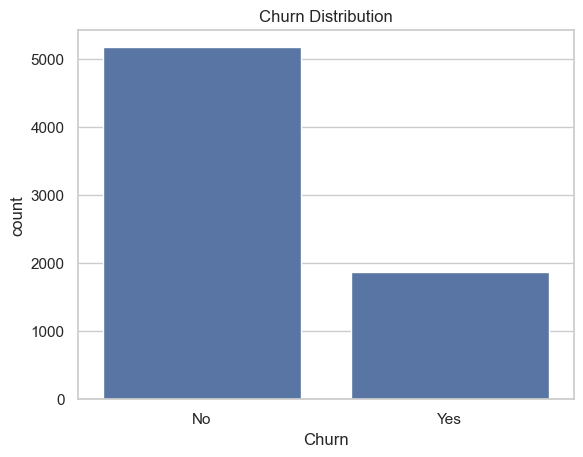

In [9]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

Roughly 26–27% customers churn

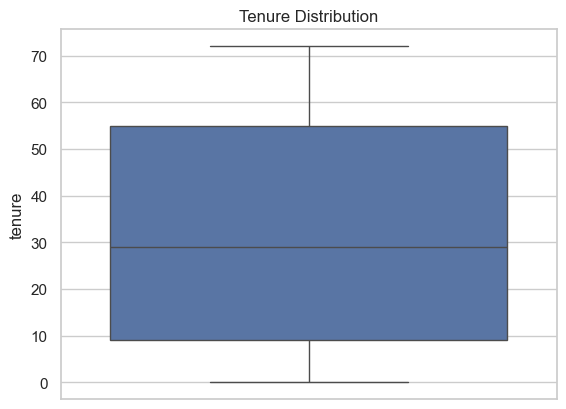

In [29]:
sns.boxplot(y=df['tenure'])
plt.title("Tenure Distribution")
plt.show()


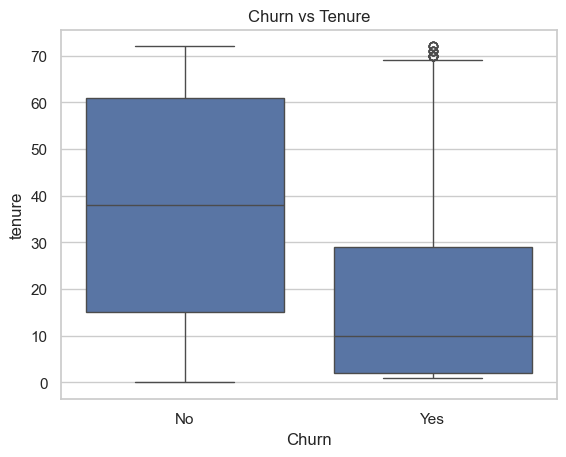

In [12]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Churn vs Tenure')
plt.show()

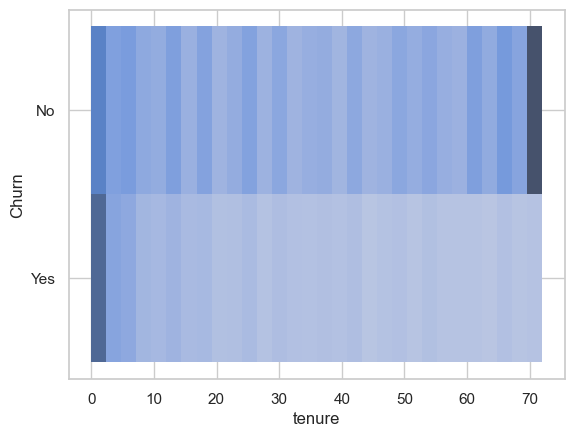

In [13]:
sns.histplot(data=df, x= 'tenure', y='Churn', bins=30, kde=True)
plt.show()

Customers with low tenure are far more likely to churn. Long-term customers show strong retention.

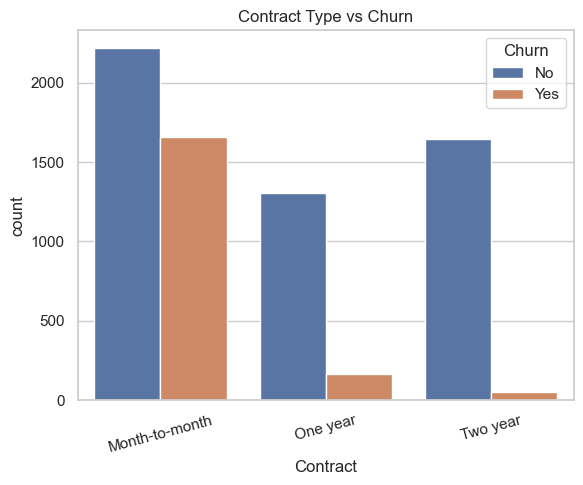

In [14]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.xticks(rotation=15)
plt.title('Contract Type vs Churn')
plt.show()

In [16]:
df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


Month-to-month contracts have the highest churn, while long-term contracts significantly reduce churn.

Business action: push customers to longer contracts.

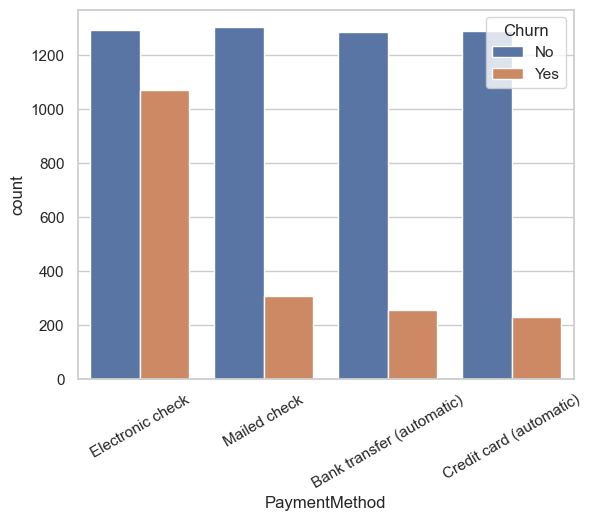

In [21]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xticks(rotation=30)
plt.show()

Customers using electronic check show higher churn compared to automatic payment methods.

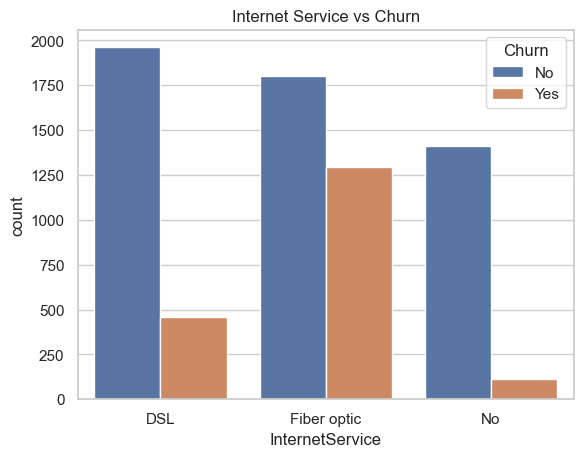

In [22]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Internet Service vs Churn')
plt.show()

Fiber optic customers show higher churn, possibly due to pricing or service expectations.

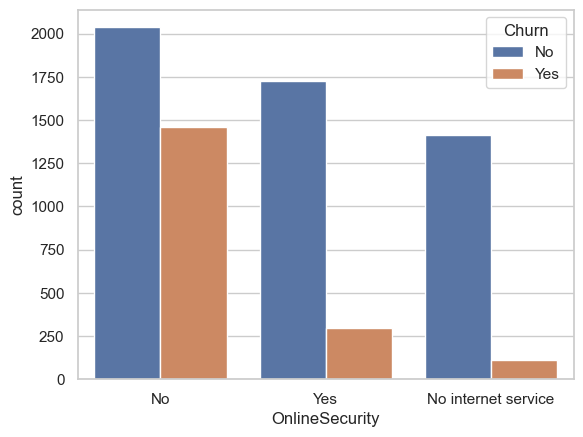

In [23]:
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.show()

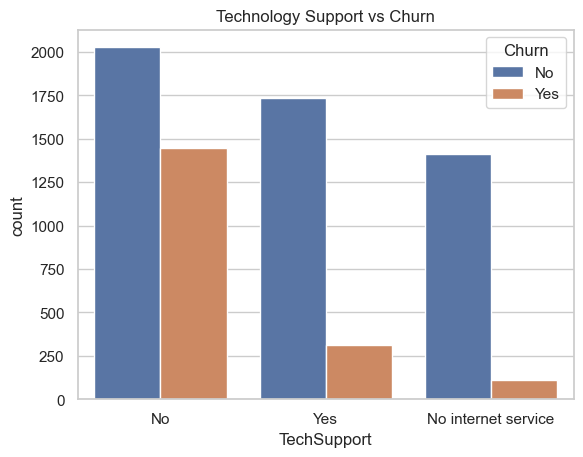

In [36]:
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title('Technology Support vs Churn')
plt.show()

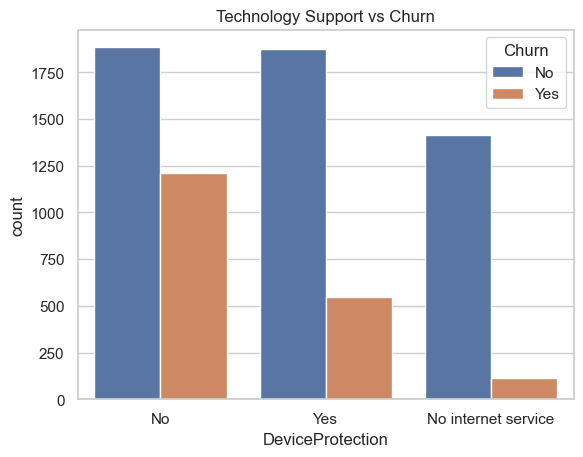

In [37]:
sns.countplot(x='DeviceProtection', hue='Churn', data=df)
plt.title('Technology Support vs Churn')
plt.show()

Customers without Security, Device Protection or TechSupport tends to churn significantly more.

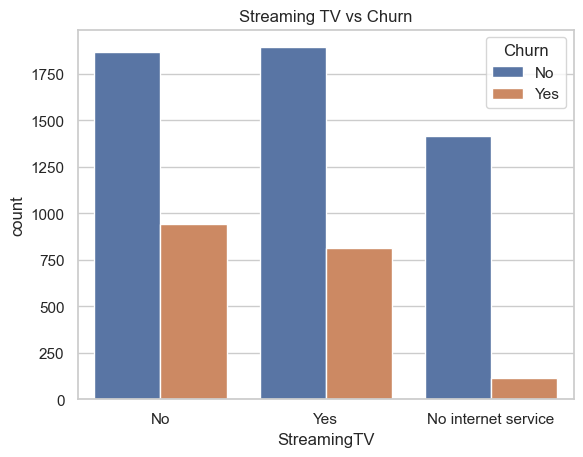

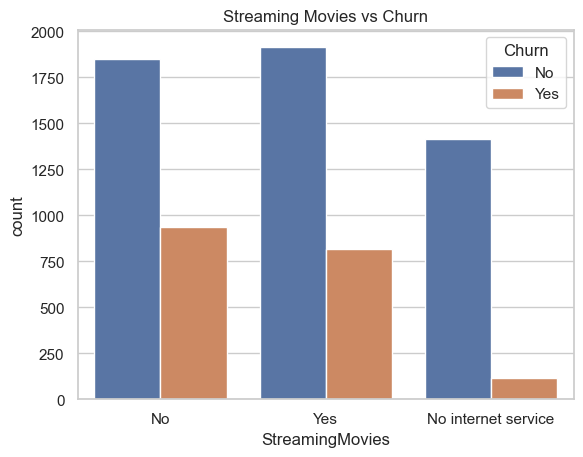

In [38]:
sns.countplot(x='StreamingTV', hue='Churn', data=df)
plt.title('Streaming TV vs Churn')
plt.show()


sns.countplot(x='StreamingMovies', hue='Churn', data=df)
plt.title('Streaming Movies vs Churn')
plt.show()

Not having streaming doesn’t seem to affect churn as strongly as contract/payment method.

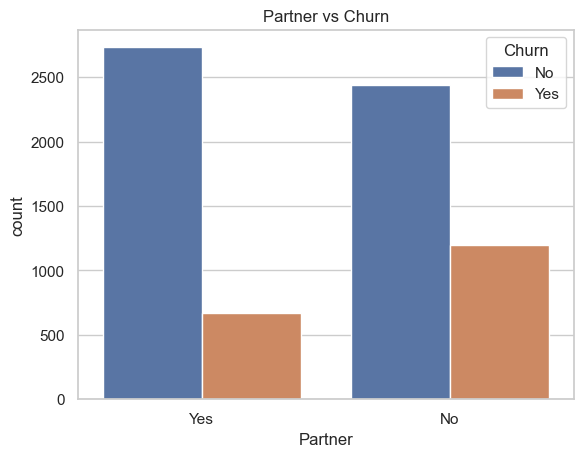

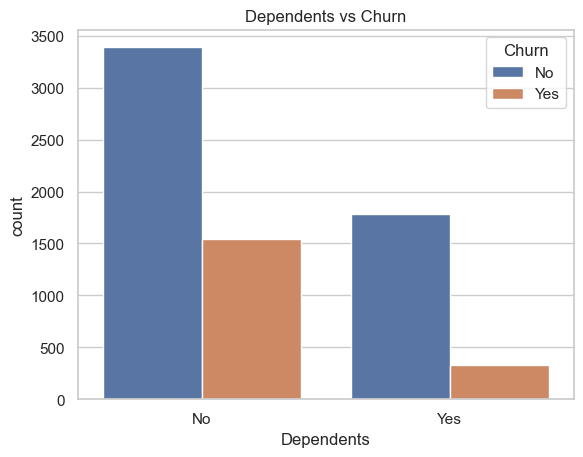

In [39]:
sns.countplot(x='Partner', hue='Churn', data=df)
plt.title("Partner vs Churn")
plt.show()

sns.countplot(x='Dependents', hue='Churn', data=df)
plt.title("Dependents vs Churn")
plt.show()


Customers without partner/dependents churn slightly more

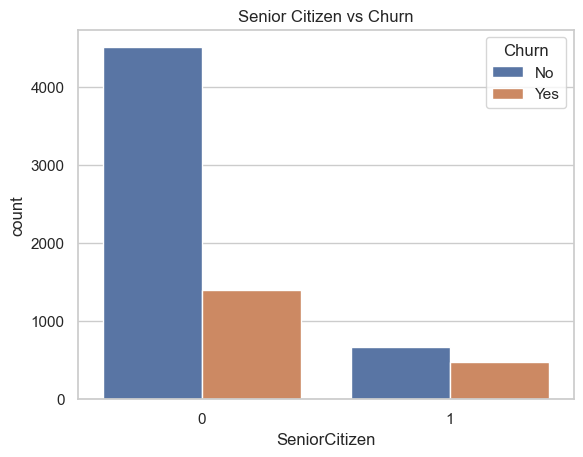

In [24]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Senior Citizen vs Churn')
plt.show()

Senior citizens show slightly higher churn

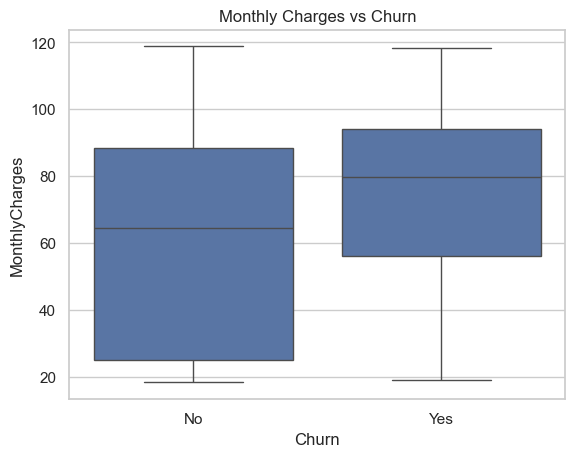

In [33]:
sns.boxplot(y='MonthlyCharges', x='Churn', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

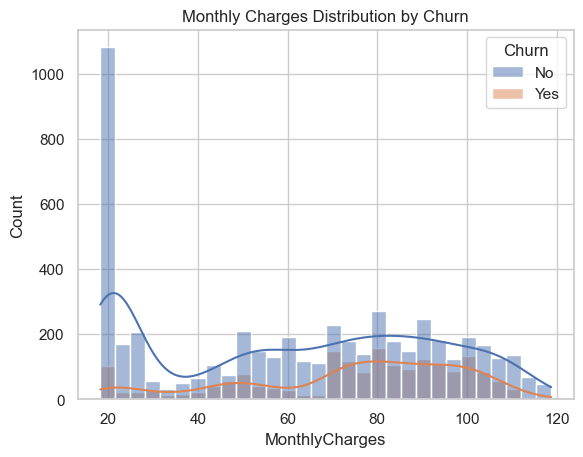

In [34]:
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30, kde=True)
plt.title("Monthly Charges Distribution by Churn")
plt.show()


Customers with higher monthly charges tend to churn more

In [27]:
df['TotalCharges'].value_counts().head(10)


TotalCharges
         11
20.2     11
19.75     9
20.05     8
19.9      8
19.65     8
45.3      7
19.55     7
20.15     6
20.25     6
Name: count, dtype: int64

In [28]:
df[['tenure', 'MonthlyCharges', 'SeniorCitizen']].corr()


,tenure,MonthlyCharges,SeniorCitizen
tenure,1.000000,0.247900,0.016567
MonthlyCharges,0.247900,1.000000,0.220173
SeniorCitizen,0.016567,0.220173,1.000000


Numeric features show low to moderate correlations, indicating minimal multicollinearity. Tenure shows a weak positive correlation with monthly charges, while senior citizen status has minimal relationship with tenure.

1. What % of customers churn?

    Churn rate ≈ 26.5%

2. Do new customers churn more than long-term ones?

    Customers with low tenure (0–12 months) churn far more

    Long-term customers (50–72 months) rarely churn

3. Does contract type affect churn?

    Month-to-month contracts → highest churn

    One-year → moderate churn

    Two-year → lowest churn

4. Are high-paying customers more likely to churn?

    MonthlyCharges distribution shows:

    Customers with higher monthly charges are slightly more likely to churn

    Lower charges have lower churn

5. Which services increase/decrease churn risk?

    Customers with security/support add-ons are less likely to churn. These services improve retention.

6. Top 3 churn-driving factors

    Tenure (shorter → higher churn)

    Contract type (month-to-month → higher churn)

    Payment method (Electronic Check → higher churn)

    High monthly charges

7. Which customers should the business target to reduce churn?

    New customers on month-to-month contracts

    Paying via electronic check

    Not subscribed to security or support add-ons

 Business action: Offer incentives, bundle services, or move them to longer contracts.

8. Any data quality issues noticed?

    TotalCharges column contains blank strings for new customers  needs conversion to numeric

    No other major outliers in numeric features

    Categorical features are clean and usable